# Breast Cancer Prediction : Logistic Regression, Perceptron, and Support Vector Machine
--------------------------

# Dataset Preprocessing

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 ## 1. Load and view the dataset.

In [119]:
df = pd.read_csv('/content/sample_data/Breast-Cancer.csv')

In [120]:
# display first 5 columns
display(df.head(5))
# check dimensions
print(df.shape)
# list column names
print(df.columns)
# datatypes
print(df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2  

## 2. Preprocess the data by normalizing it and handling missing values outliers, and categorical variables.

### Missing Values &  unnecessary columns

In [121]:
# checking for missing values
print("missing values:\n\n",df.isnull().sum())
# checking for duplicated values
print("\nduplicated values:", df.duplicated().sum())

missing values:

 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

The Unnamed: 32 column has all its values set to null.



In [122]:
# Drop unnecessary columns
# Drop the Unnamed: 32 & id column since they have no significance.
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Outliers


In [123]:
# Function to calculate outliers using IQR method
def count_outliers(data):
    outliers = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].count()
    return outliers

# Count outliers
outlier_counts = count_outliers(df)
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display outlier counts
print(outlier_counts_df)

                    Feature  Outlier Count
0               radius_mean             14
1              texture_mean              7
2            perimeter_mean             13
3                 area_mean             25
4           smoothness_mean              6
5          compactness_mean             16
6            concavity_mean             18
7       concave points_mean             10
8             symmetry_mean             15
9    fractal_dimension_mean             15
10                radius_se             38
11               texture_se             20
12             perimeter_se             38
13                  area_se             65
14            smoothness_se             30
15           compactness_se             28
16             concavity_se             22
17        concave points_se             19
18              symmetry_se             27
19     fractal_dimension_se             28
20             radius_worst             17
21            texture_worst              5
22         

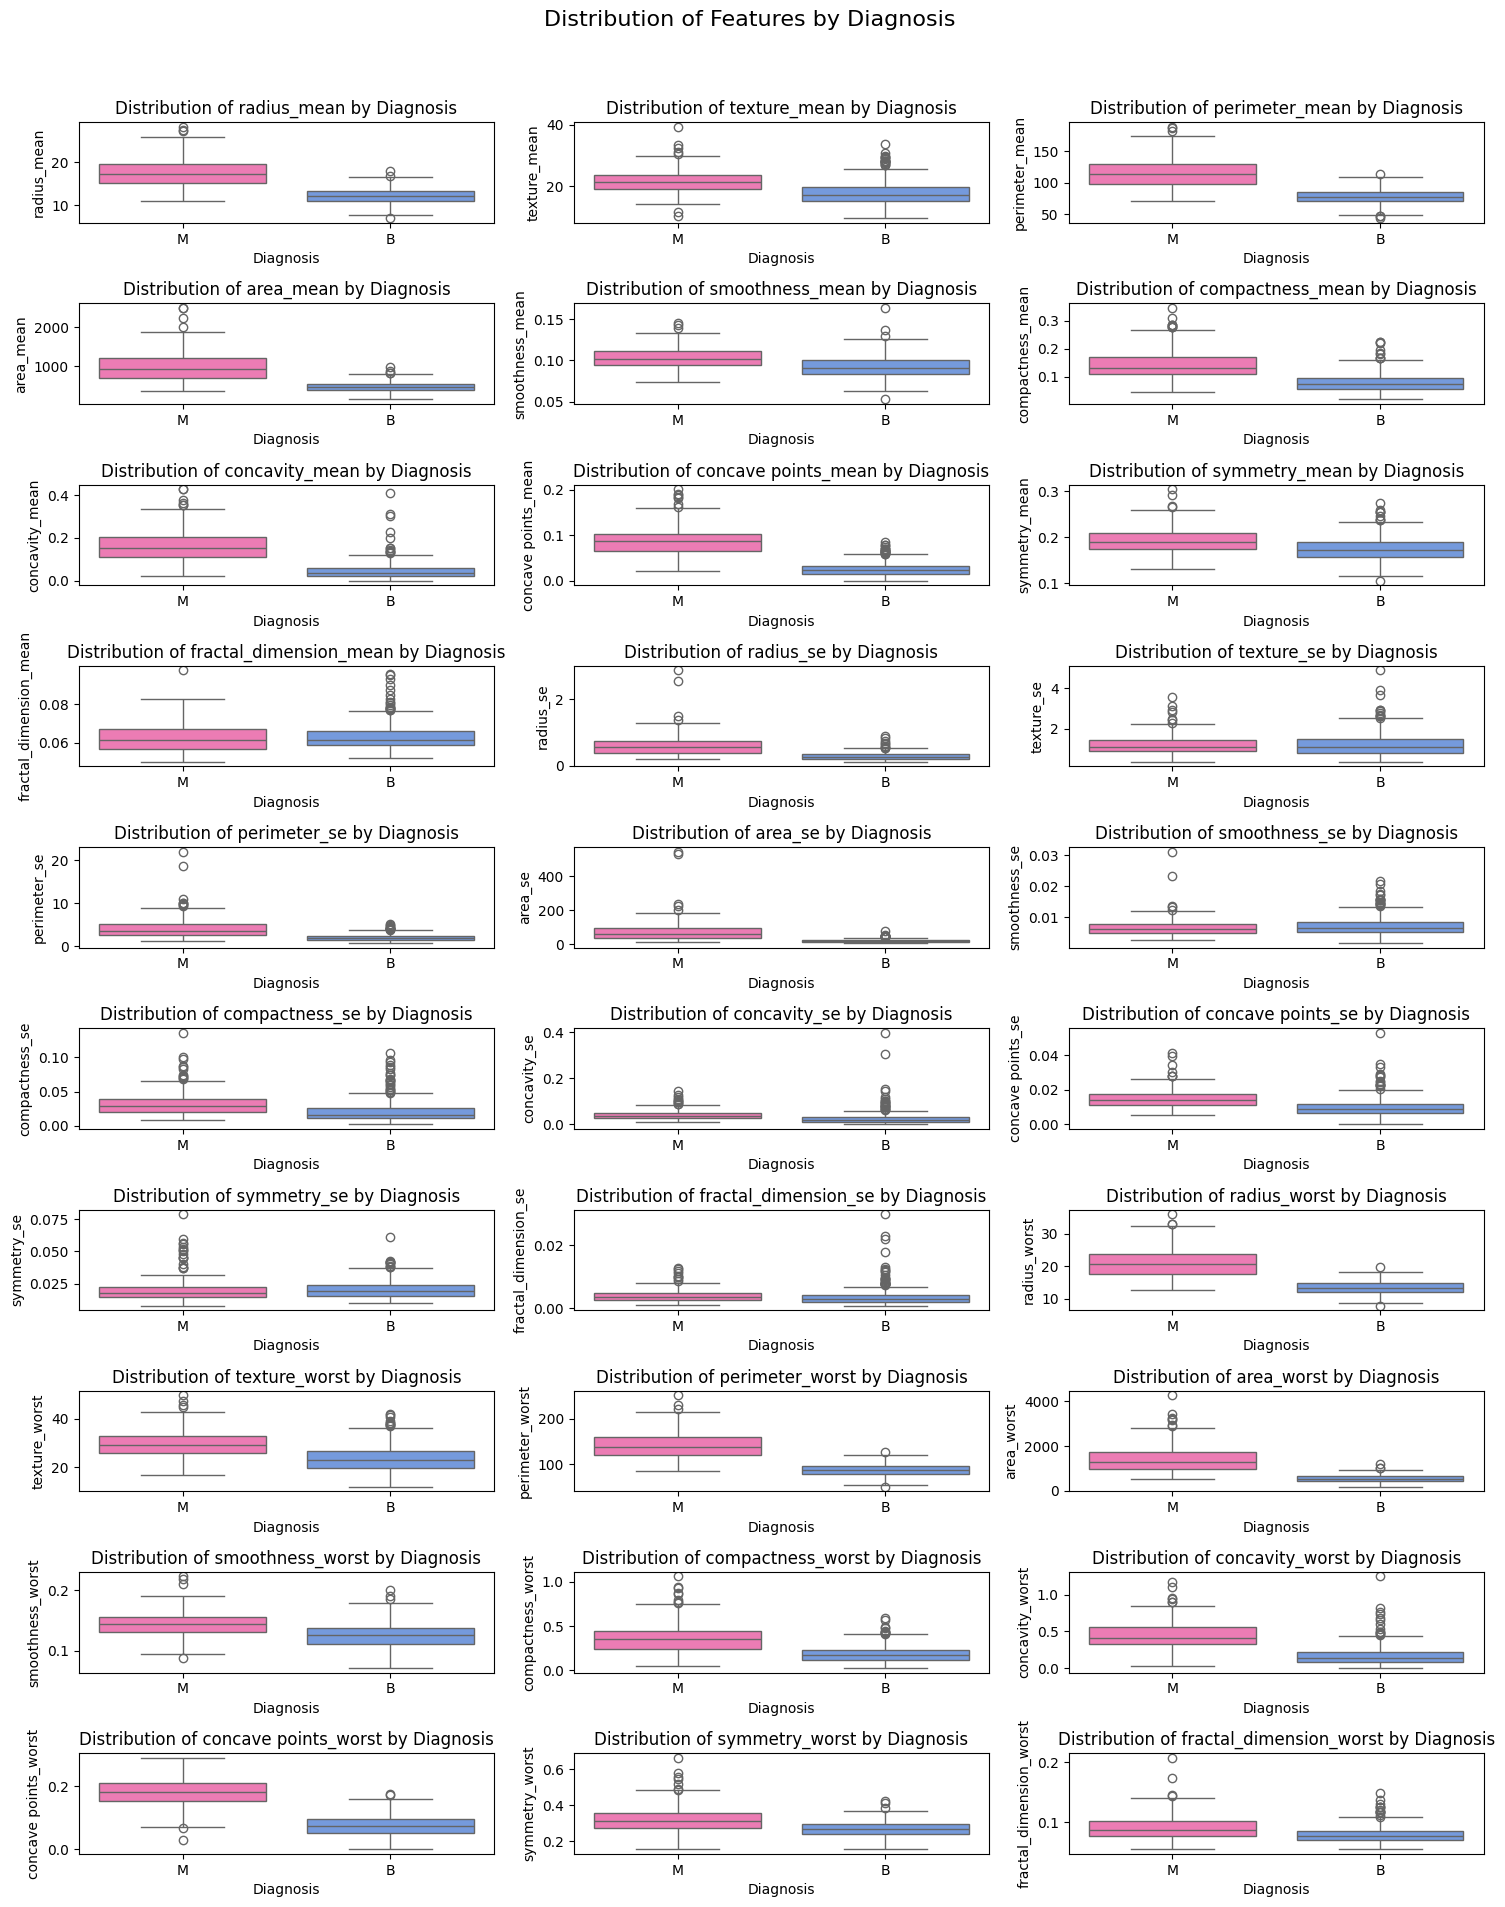

In [124]:
# Visualizing outliers
# Set up the figure and axes for a grid layout
features = df.select_dtypes(include=[float]).columns  # Select only numerical columns
num_features = len(features)
num_cols = 3  # Number of columns for the plot grid
num_rows = (num_features // num_cols) + 1  # Calculate rows based on total features

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.suptitle("Distribution of Features by Diagnosis", fontsize=16, y=1.02)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=df, x='diagnosis', y=feature, palette=['#FF69B4', '#6495ED'], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Diagnosis")
    axes[i].set_xlabel("Diagnosis")
    axes[i].set_ylabel(feature)

# Hide any empty subplots if features < rows * cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Target Feature Encoding & Distribution

the target feature (diagnosis) is an object that needs encoding



In [125]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M':1})
# count values in each category
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


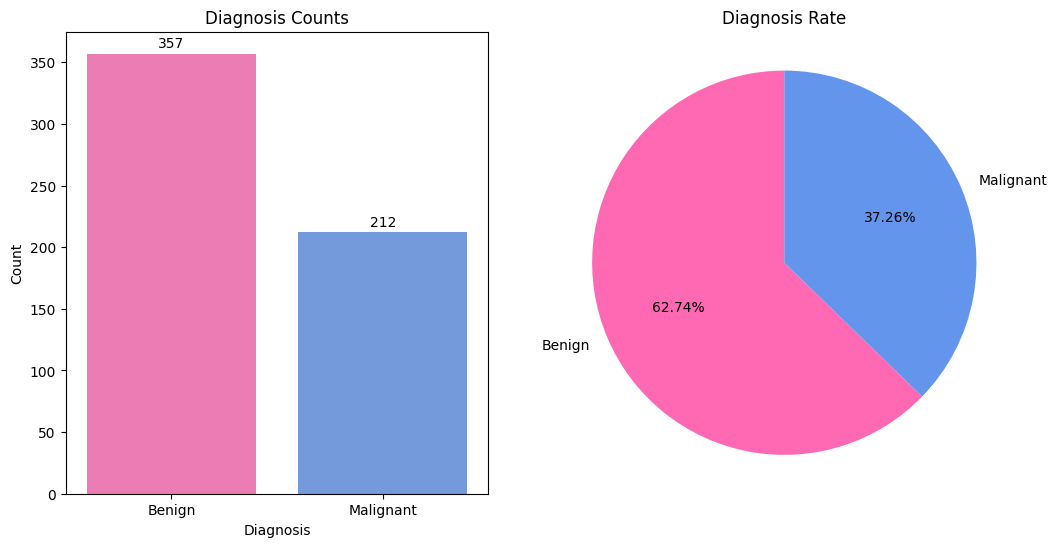

In [126]:
import warnings
warnings.filterwarnings('ignore')

custom_colors = ['#FF69B4', '#6495ED']  #  custom colors for pink and blue

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for counts
sns.countplot(x='diagnosis', data=df, palette=custom_colors, ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5), ha='center')
axes[0].set_title('Diagnosis Counts')
axes[0].set_xlabel('Diagnosis')
axes[0].set_xticklabels(['Benign', 'Malignant'])
axes[0].set_ylabel('Count')

# Pie chart for rate
axes[1].pie(df['diagnosis'].value_counts(),
            labels=['Benign', 'Malignant'],  # Set labels
            autopct='%1.2f%%',
            startangle=90,
            colors=custom_colors)
axes[1].set_title('Diagnosis Rate')
axes[1].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Display the plots
plt.show()


Target feature labels are imbalanced with more Benign than Melignant


### Correlation Heatmap

Darker colors might indicate stronger correlations (either positive or negative). Lighter colors suggest weaker correlations.

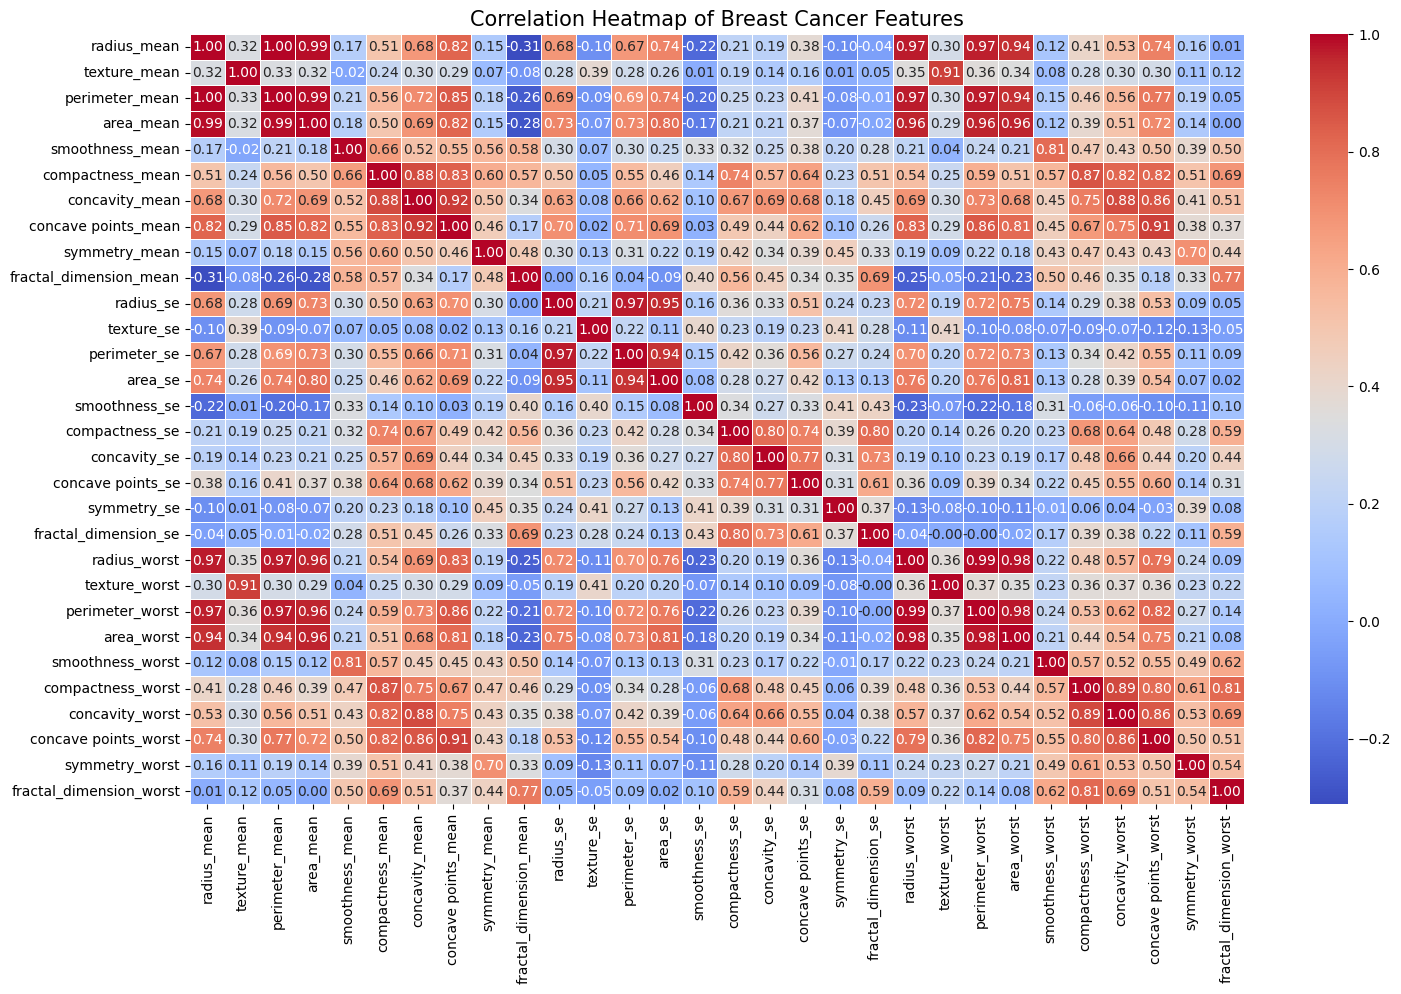

In [127]:
corr_matrix = df.loc[:, df.columns != 'diagnosis'].corr()
plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features', size=15)
plt.show()

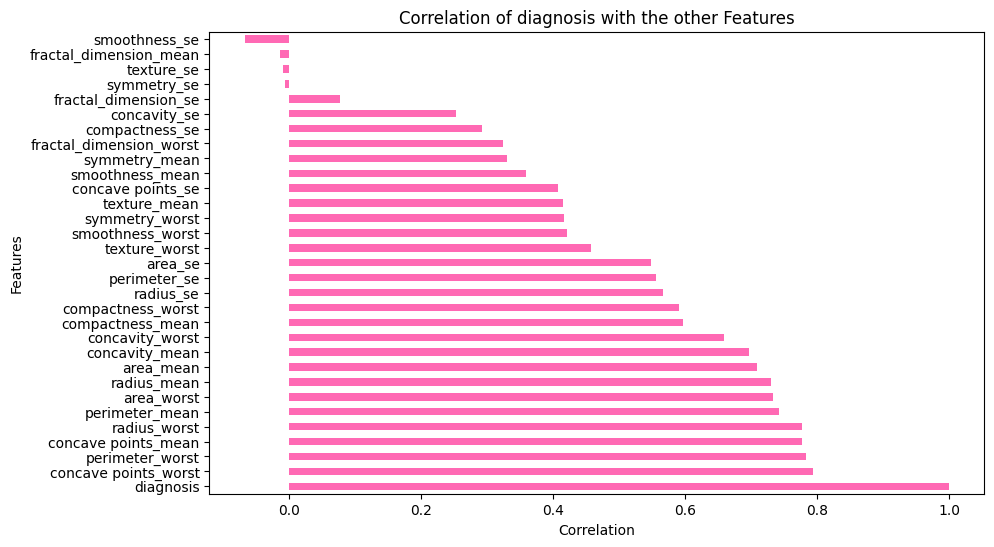

In [128]:
corr_vector = df.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)
corr_vector.plot(kind='barh', figsize=(10, 6), color='#FF69B4')
plt.title('Correlation of diagnosis with the other Features')
plt.ylabel('Features')
plt.xlabel('Correlation')
plt.show()


`smoothness_se`, `fractal_dimension_mean`, `texture_se`, `ymmetry_se` and `fractal_dimension_se.` have low correlations ,i will consider dropping them

High multicollinearity between high correlates features : aim to keep a subset that provides the most unique information.

High-correlation features (correlation > 0.6): ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


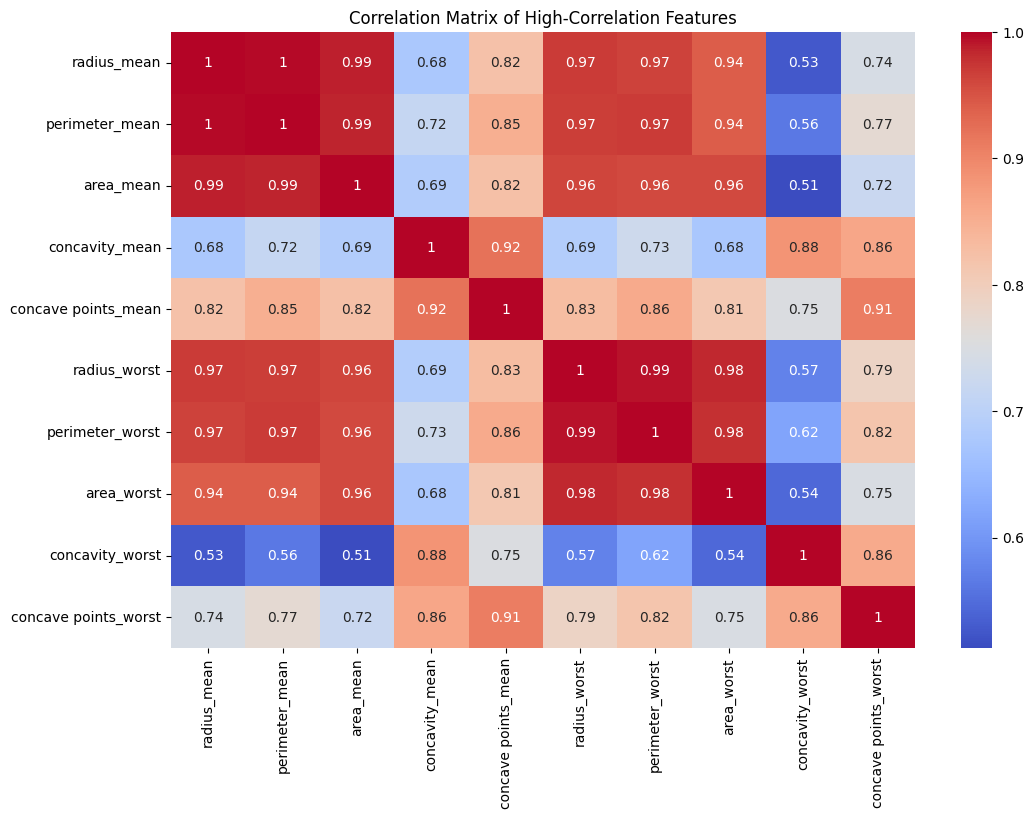

In [129]:
# Set the correlation threshold
threshold = 0.6

# Calculate correlation with the target feature 'diagnosis'
corr_matrix = df.corr(numeric_only=True)
high_corr_features_list = corr_matrix.index[abs(corr_matrix['diagnosis']) > threshold].tolist()

# Remove the target column itself from the list to avoid including it
high_corr_features_list.remove('diagnosis')

# Create a new DataFrame with only the high-correlation features
high_corr_features = df[high_corr_features_list]

# Display the selected high-correlation features
print("High-correlation features (correlation > 0.6):", high_corr_features.columns.tolist())
high_corr_features.head()
# Assuming `high_corr_features` is a DataFrame with the high-correlation features
corr_matrix = high_corr_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of High-Correlation Features")
plt.show()

`radius_mean` and `perimeter_mean` (corr = 1): Keep one : `radius_mean` (since they are the same).

`radius_worst`, `perimeter_worst`, and `area_worst`: are all highly correlated with each other so  keep one : `radius_worst`

`concave points_mean` and `concave points_worst `: drop `concave points_worst`.

`concavity_mean` has a higher correlation with diagnosis, keep it and drop `concavity_worst`



### Dropping More Columns

In [130]:
# drop :smoothness_se , area_mean,  perimeter_mean , perimeter_worst , area_worst,  concave points_worst,  concavity_worst
df.drop(['smoothness_se', 'area_mean','perimeter_mean','perimeter_worst','concave points_worst','concavity_worst'], axis=1, inplace=True)

print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


##3. Split the dataset into training and testing sets with an 80:20 ratio.

In [131]:
#  'diagnosis' is the target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets with an 80:20 ratio, and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Display the output
#print("Training target values (y_train):\n", y_train.head(3), "\n")
#print("Training features (X_train):\n", X_train.head(3), "\n")

print("x train and test :\n",X_train.shape,'\n',X_test.shape,"\n\ny train and test :\n",y_train.shape,'\n',y_test.shape)

x train and test :
 (455, 24) 
 (114, 24) 

y train and test :
 (455,) 
 (114,)


### Data Scaling


In [132]:
 # max value = 1 , min value = 0
scaler = StandardScaler()
#Fit on training set only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression, Perceptron, and Support Vector Machine (SVM)
------

## Logistic Regression

Logistic regression is used for binary classification problems.

It uses the sigmoid function, a mathematical function used to map any real-valued number to a value between 0 and 1.

In [133]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.W = None
        self.b = None
        self.X = None
        self.y = None
        self.loss_history = []  # Initialize loss_history here

    def sigmoid(self, z):
        #Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def initialize_parameter(self, X):
        #Initializes weights and bias
        self.W = np.zeros(X.shape[1])
        self.b = 0.0

    def forward(self, X):
        #Computes forward propagation for given input X
        Z = np.matmul(X, self.W) + self.b
        A = self.sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        #Computes the cost function for given predictions
        m = self.X.shape[0]  # number of training examples
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (1 - self.y))
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        #Computes the gradients for weights and bias
        m = self.X.shape[0]
        dw = (1 / m) * np.dot(self.X.T, (predictions - self.y))
        db = (1 / m) * np.sum(predictions - self.y)
        return dw, db

    def fit(self, X, y):
        #Trains the logistic regression model using gradient descent.
        self.X = X
        self.y = y
        self.initialize_parameter(X)

        for i in range(self.n_iterations):
            # Forward propagation
            predictions = self.forward(X)

            # Compute the cost
            cost = self.compute_cost(predictions)
            self.loss_history.append(cost)

            # Compute gradients
            dw, db = self.compute_gradient(predictions)

            # Update parameters
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Print cost every 100 iterations
            if i % 10000 == 0:
                print(f"Cost after iteration {i}: {cost}")


    def predict(self, X):
        """Predicts binary labels for input data."""
        predictions = self.forward(X)
        y_pred_class = [1 if i > 0.5 else 0 for i in predictions]
        return np.array(y_pred_class)

In [134]:
# Instantiate the model
model = LogisticRegression(learning_rate=0.0001, n_iterations=100000)

# Train the model
#model.fit(X_train, y_train)
# Train the model with scaled features
model.fit(X_train_scaled, y_train)


Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.30078771835363194
Cost after iteration 20000: 0.22402334317392616
Cost after iteration 30000: 0.18793127809460017
Cost after iteration 40000: 0.1664449387511575
Cost after iteration 50000: 0.15199254243669041
Cost after iteration 60000: 0.14149312923606916
Cost after iteration 70000: 0.1334507607414024
Cost after iteration 80000: 0.12704890502256105
Cost after iteration 90000: 0.12180245452238529


In [135]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



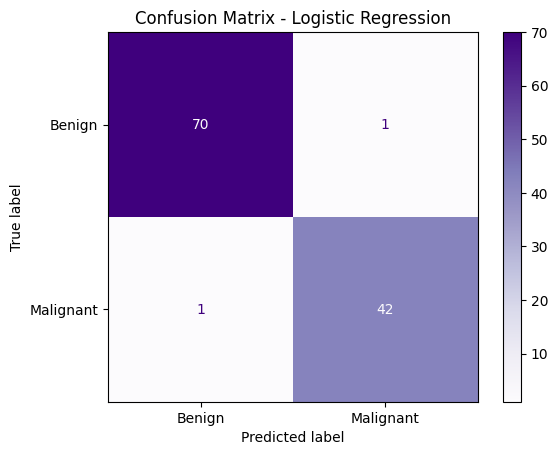

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benign', 'Malignant'], cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

True Positives (TP): predicted 40 instances as "Malignant".


True Negatives (TN): predicted 70 instances as "Benign".

False Positives (FP): incorrectly predicted 1 instance as "Malignant" when it's "Benign".

False Negatives (FN): incorrectly predicted 1 instance as "Benign" when they were actually "Malignant".

## Support Vector Machine (SVM)

In [137]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # convert 0 labels to -1 for SVM

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw = self.lambda_param * self.w
                    db = 0
                else:
                    dw = self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db = y_[idx]
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.where(linear_output >= 0, 1, 0)

Use grid search to find the best hyperparameters for the SVM model.

this section uses grid search to  iterate over combinations of hyperparameters (learning rate, lambda, and iterations) to find the best parameters based on validation accuracy.

In [138]:
# Define the grid search function
def svm_grid_search(X_train, y_train, X_val, y_val, param_grid):
    best_score = 0
    best_params = {}

    # Iterate over all combinations of parameters in the grid
    for lr in param_grid['learning_rate']:
        for lp in param_grid['lambda_param']:
            for n_iter in param_grid['n_iterations']:
                # Initialize and train the model with current hyperparameters
                svm = SVM(learning_rate=lr, lambda_param=lp, n_iterations=n_iter)
                svm.fit(X_train, y_train)

                # Validate the model
                y_pred = svm.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)

                # Update best parameters if current accuracy is better
                if accuracy > best_score:
                    best_score = accuracy
                    best_params = {'learning_rate': lr, 'lambda_param': lp, 'n_iterations': n_iter}

                print(f"LearningR: {lr}, LambdaP: {lp}, iteration: {n_iter} - Accuracy: {accuracy}")

    print("\nBest Score:", best_score)
    print("Best Params:", best_params)
    return best_params

# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'lambda_param': [0.001, 0.01, 0.1],
    'n_iterations': [1000, 5000, 10000]
}

# Split training data further into a validation set for hyperparameter tuning
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Perform grid search to find the best parameters
best_params = svm_grid_search(X_train_sub, y_train_sub, X_val, y_val, param_grid)

# Train final model with best parameters
best_svm_model = SVM(learning_rate=best_params['learning_rate'],
                     lambda_param=best_params['lambda_param'],
                     n_iterations=best_params['n_iterations'])
best_svm_model.fit(X_train_scaled, y_train)

# Evaluate final model on test data
y_pred_best = best_svm_model.predict(X_test_scaled)
print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Instantiate and train SVM
svm_model = SVM(learning_rate=0.0001, lambda_param=0.01, n_iterations=1000)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

LearningR: 0.0001, LambdaP: 0.001, iteration: 1000 - Accuracy: 0.9560439560439561
LearningR: 0.0001, LambdaP: 0.001, iteration: 5000 - Accuracy: 0.945054945054945
LearningR: 0.0001, LambdaP: 0.001, iteration: 10000 - Accuracy: 0.945054945054945
LearningR: 0.0001, LambdaP: 0.01, iteration: 1000 - Accuracy: 0.967032967032967
LearningR: 0.0001, LambdaP: 0.01, iteration: 5000 - Accuracy: 0.945054945054945
LearningR: 0.0001, LambdaP: 0.01, iteration: 10000 - Accuracy: 0.945054945054945
LearningR: 0.0001, LambdaP: 0.1, iteration: 1000 - Accuracy: 0.967032967032967
LearningR: 0.0001, LambdaP: 0.1, iteration: 5000 - Accuracy: 0.967032967032967
LearningR: 0.0001, LambdaP: 0.1, iteration: 10000 - Accuracy: 0.967032967032967
LearningR: 0.001, LambdaP: 0.001, iteration: 1000 - Accuracy: 0.945054945054945
LearningR: 0.001, LambdaP: 0.001, iteration: 5000 - Accuracy: 0.945054945054945
LearningR: 0.001, LambdaP: 0.001, iteration: 10000 - Accuracy: 0.945054945054945
LearningR: 0.001, LambdaP: 0.01, it

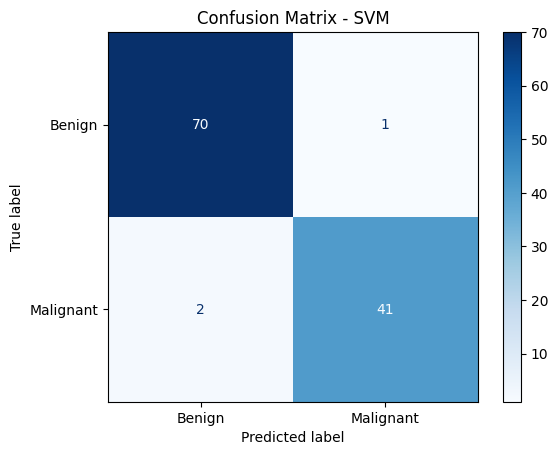

In [139]:
# Confusion matrix for SVM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=['Benign', 'Malignant'], cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

True Positives (TP): The model correctly predicted 41 instances as "Malignant"

True Negatives (TN): The model correctly predicted 71 instances as "Benign"

False Positives (FP): The model made no incorrect predictions of "Benign" as "Malignant"

False Negatives (FN): The model incorrectly predicted 2 instances as "Benign" when they were actually "Malignant"

## Perceptron

In [140]:
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01, n_iterations=1000):
        # Initialize weights with random values, including one extra for bias
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    # Linear combination of inputs and weights
    def linear(self, inputs):
        return np.dot(inputs, self.weights[1:]) + self.weights[0]

    # Heaviside step function as the activation
    def Heaviside_step_fn(self, z):
        return 1 if z >= 0 else 0

    # Predict method using the linear layer and activation function
    def predict(self, inputs):
        Z = self.linear(inputs)
        # Handles both single sample and batch inputs
        if np.isscalar(Z):
            return self.Heaviside_step_fn(Z)
        return np.array([self.Heaviside_step_fn(z) for z in Z])

    # Compute the error (loss) for a given prediction and target
    def loss(self, prediction, target):
        return target - prediction

    # Train method for updating weights based on error
    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = self.loss(prediction, target)
        # Weight update based on prediction error
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error  # Update bias

    # Fit method to train over multiple epochs
    def fit(self, X, y):
        for _ in range(self.n_iterations):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

In [141]:
# Instantiate and train Perceptron
perceptron_model = Perceptron(num_inputs=X_train_scaled.shape[1], learning_rate=0.001, n_iterations=10000)
perceptron_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_perceptron = perceptron_model.predict(X_test_scaled)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Perceptron Confusion Matrix:\n", confusion_matrix(y_test, y_pred_perceptron))
print("Perceptron Classification Report:\n", classification_report(y_test, y_pred_perceptron))

Perceptron Accuracy: 0.9385964912280702
Perceptron Confusion Matrix:
 [[65  6]
 [ 1 42]]
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.88      0.98      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



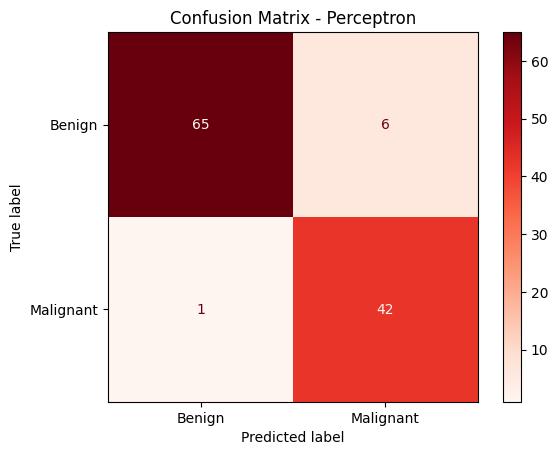

In [142]:
# Confusion matrix for Perceptron
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_perceptron, display_labels=['Benign', 'Malignant'], cmap='Reds')
plt.title("Confusion Matrix - Perceptron")
plt.show()


True Positives (TP): The model correctly predicted 42 instances as "Malignant".

True Negatives (TN): The model correctly predicted 65 instances as "Benign".

False Positives (FP): The model incorrectly predicted 6 instances as "Malignant" when they were actually "Benign".

False Negatives (FN): The model incorrectly predicted 2 instance as "Benign" when it was actually "Malignant".